In [1]:

# Imports for iris unsupervised learning workflow
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

sns.set(style='whitegrid')
print('Imports complete')


Imports complete


In [2]:

# Load iris dataset and build a DataFrame
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='target')
print('Data loaded: X shape ' + str(X.shape))
print('Target loaded: y shape ' + str(y.shape))
print(X.head())
print(X.describe())


Data loaded: X shape (150, 4)
Target loaded: y shape (150,)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000     

<Figure size 640x480 with 0 Axes>

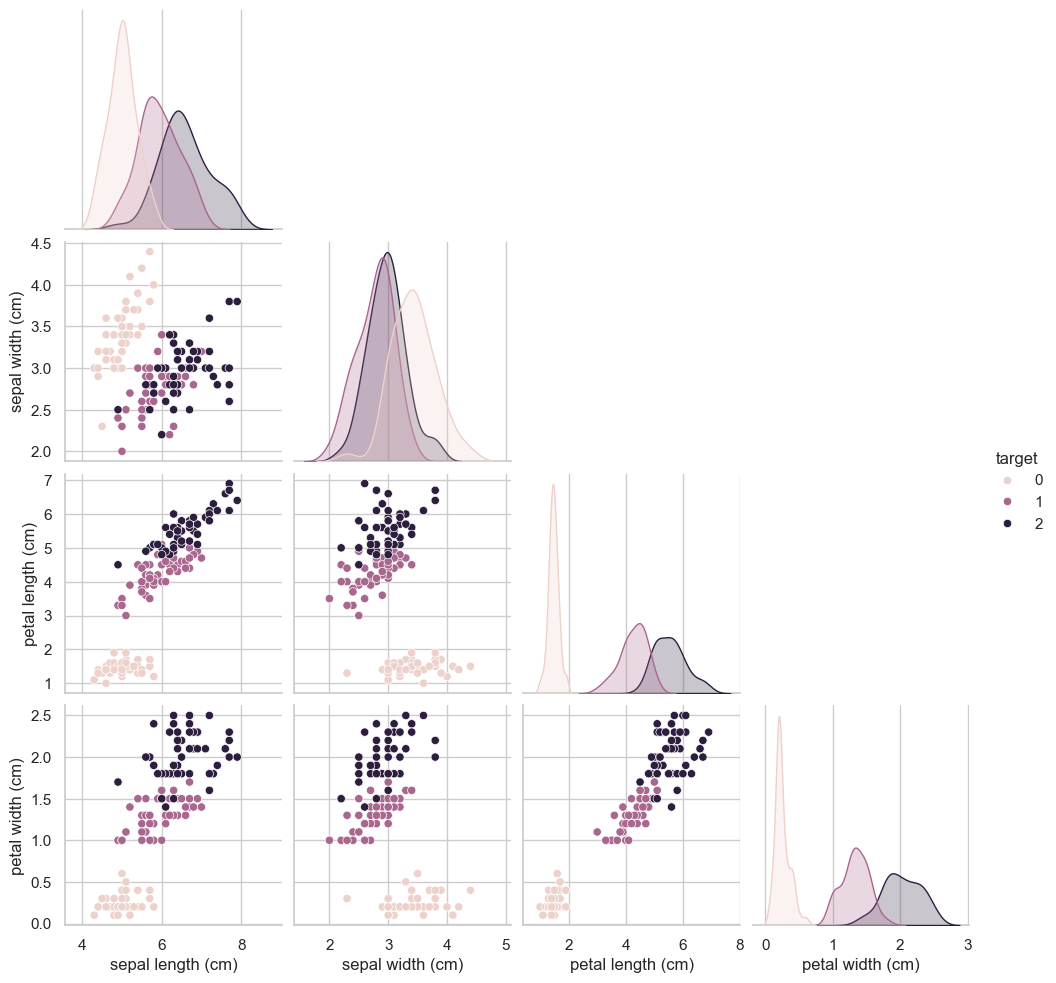

Displayed pairplot


In [3]:

# Pairplot to visualize feature relationships colored by true species
plt.figure()
sns.pairplot(pd.concat([X, y], axis=1), hue='target', corner=True)
plt.show()
print('Displayed pairplot')


Scaled features: shape (150, 4)
PCA complete: explained variance ratio [0.72962445 0.22850762]


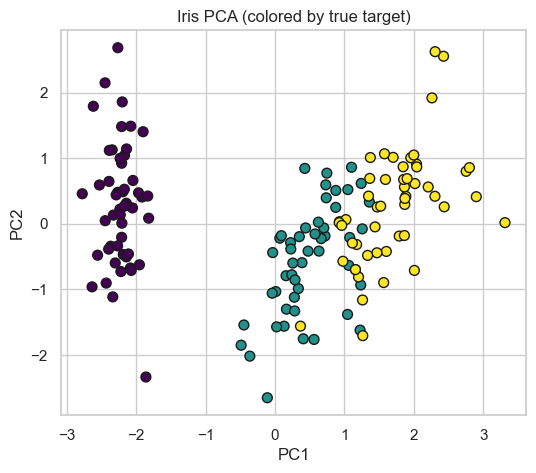

Displayed PCA scatter


In [4]:

# Scale features and run PCA for 2D visualization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print('Scaled features: shape ' + str(X_scaled.shape))

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
print('PCA complete: explained variance ratio ' + str(pca.explained_variance_ratio_))

# Scatter PCA
plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis', s=50, edgecolor='k')
plt.title('Iris PCA (colored by true target)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
print('Displayed PCA scatter')


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

k tested: [2, 3, 4, 5, 6, 7]
silhouette scores: [np.float64(0.5817500491982808), np.float64(0.45994823920518635), np.float64(0.38694104154427816), np.float64(0.3459012795948778), np.float64(0.31707940193569023), np.float64(0.3201967939183684)]


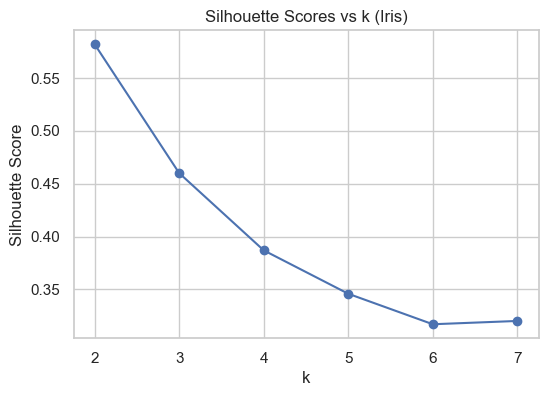

Displayed silhouette plot


In [5]:

# Try a range of k and compute silhouette scores
k_values = list(range(2, 8))
sil_scores = []

for k in tqdm(k_values):
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = km.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)

print('k tested: ' + str(k_values))
print('silhouette scores: ' + str(sil_scores))

plt.figure(figsize=(6,4))
plt.plot(k_values, sil_scores, marker='o')
plt.xticks(k_values)
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores vs k (Iris)')
plt.show()
print('Displayed silhouette plot')


Best k by silhouette: 2


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


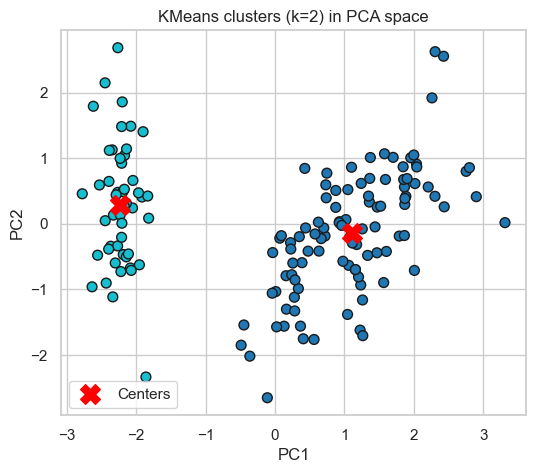

Displayed clusters with centers


In [6]:

# Choose best k by silhouette
best_k = int(k_values[int(np.argmax(sil_scores))])
print('Best k by silhouette: ' + str(best_k))

best_kmeans = KMeans(n_clusters=best_k, n_init=10, random_state=42)
cluster_labels = best_kmeans.fit_predict(X_scaled)

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=cluster_labels, cmap='tab10', s=50, edgecolor='k')
centers_pca = pca.transform(best_kmeans.cluster_centers_)
plt.scatter(centers_pca[:,0], centers_pca[:,1], c='red', s=200, marker='X', label='Centers')
plt.legend()
plt.title('KMeans clusters (k=' + str(best_k) + ') in PCA space')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
print('Displayed clusters with centers')


In [7]:

# Contingency table comparing clusters to true targets
ct = pd.crosstab(cluster_labels, y, rownames=['cluster'], colnames=['target'])
print(ct)


target    0   1   2
cluster            
0         0  50  50
1        50   0   0


In [11]:
# Compute KMeans predictions (cluster labels) and a best-match accuracy to true iris classes
# Assumes previous iris variables are not in memory, so we load and redo minimal steps quickly.

import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.optimize import linear_sum_assignment

# Load
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='target')
print('Loaded iris for prediction and accuracy')

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print('Scaled X for clustering')

# Fit KMeans with k=3 (known number of species)
km = KMeans(n_clusters=3, n_init=10, random_state=42)
cluster_labels = km.fit_predict(X_scaled)
print('Computed cluster predictions')

# Map cluster labels to true labels using Hungarian algorithm to maximize accuracy
# Build cost matrix where cost[i,j] = number of points in cluster i that are NOT class j
cost_matrix = np.zeros((3,3), dtype=int)
for i in range(3):
    for j in range(3):
        match = np.sum((cluster_labels == i) & (y.values == j))
        cost_matrix[i, j] = cluster_labels[cluster_labels == i].shape[0] - match

row_ind, col_ind = linear_sum_assignment(cost_matrix)
label_map = {row: col for row, col in zip(row_ind, col_ind)}

# Remap predictions
y_pred = np.vectorize(lambda c: label_map[c])(cluster_labels)
acc = accuracy_score(y, y_pred)

print('Accuracy (Hungarian-mapped): ' + str(acc))

# Show a small sample of predictions vs true
pred_df = pd.DataFrame({
    'true': y.values,
    'pred': y_pred
})
print(pred_df.head())

Loaded iris for prediction and accuracy
Scaled X for clustering
Computed cluster predictions
Accuracy (Hungarian-mapped): 0.8333333333333334
   true  pred
0     0     0
1     0     0
2     0     0
3     0     0
4     0     0


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


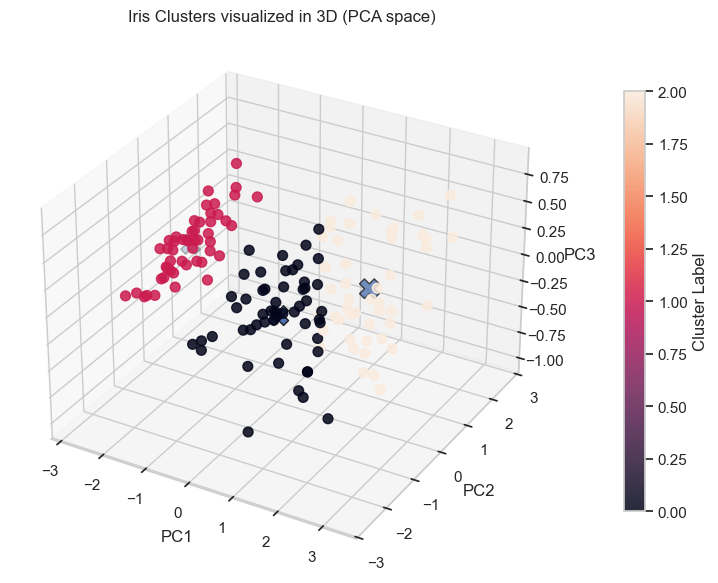

In [12]:
# 3D visualization of cluster assignments on the Iris dataset

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (needed for 3D projection)

# 1) Load and scale data
iris = load_iris()
X = iris.data  # (150, 4)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2) Reduce to 3D with PCA (so we can plot in 3D)
pca = PCA(n_components=3, random_state=42)
X_pca3 = pca.fit_transform(X_scaled)

# 3) Cluster (KMeans with k=3 for Iris)
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Transform centroids into the same 3D PCA space for plotting
centroids_3d = pca.transform(kmeans.cluster_centers_)

# 4) Plot in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_pca3[:, 0], X_pca3[:, 1], X_pca3[:, 2],
    c=labels, s=50, alpha=0.85
)

# Plot cluster centroids
ax.scatter(
    centroids_3d[:, 0], centroids_3d[:, 1], centroids_3d[:, 2],
    marker='X', s=200, edgecolor='k'
)

ax.set_title('Iris Clusters visualized in 3D (PCA space)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Legend-like colorbar
cbar = plt.colorbar(scatter, ax=ax, fraction=0.03, pad=0.1)
cbar.set_label('Cluster Label')

plt.tight_layout()
plt.show()